In [1]:
# Import dataset
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
fpath = '/kaggle/input/drugs-side-effects-and-medical-condition/drugs_side_effects_drugs_com.csv'
data = pd.read_csv(fpath)

# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
print("column:")
print(data.columns)

The dataset has 2931 rows and 17 columns
column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [2]:
# Show the main information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [3]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [4]:
# Dropping the 'brand_names' column and delete from dataset
data.drop(columns=['brand_names'], inplace=True)

In [5]:
# Find duplicate rows based on all columns
duplicate_rows= data[data.duplicated()]
#Count the duplicated rows
duplicate_count = duplicate_rows.shape[0] 
# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count) 
print(duplicate_rows) # Print the duplicate rows

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [6]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
# data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')

print(data.dtypes.value_counts())

object     14
float64     2
Name: count, dtype: int64


In [7]:
# Convert 'activity' to string, remove whitespace and '%' character, then convert to float and divide by 100
data['activity'] = data['activity'].astype(str).str.replace(r'\s+', '', regex=True).str.rstrip('%').astype('float')/100

# Display the updated 'activity' column
print(data['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [8]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [9]:
# In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.
# Therefore, let's replace the values of ak=lcohol column with boolean values.
# Let X will be 1 of interaction, NaN will be 0.
data['alcohol']=data['alcohol'].replace(np.NaN,'0')
data['alcohol']=data['alcohol'].replace({'X': 1})

In [10]:
# To avoid missing values let's fill them with some information
# In our case we will replace all them
# Fill the null values in 'side_effects' and 'related_drugs' with no
data["side_effects"] = data['side_effects'].fillna('Unknown')
data["related_drugs"] = data['related_drugs'].fillna('Unknown')

In [11]:
# Fill the null values with 0 as a base for 'rating' and 'no_of_reviews' columns
# It will show that there are no information about it
data["rating"] = data['rating'].fillna('0')
data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [12]:
# Fill the null values with ?
data['generic_name']=data['generic_name'].replace(np.NaN,'Unknown')

# Fill the null values with undefined for 'drug_classes'
data['drug_classes']=data['drug_classes'].replace(np.NaN,'Unknown')

In [13]:
# For these two columns we already have some category values from dataset's description
# So, let's check the categorical values

# For Rx_OTC
data["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [14]:
# For pregnancy categories
data["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [15]:
# Fill the null value with Unknown as a basic value
data['rx_otc']=data['rx_otc'].replace(np.NaN, 'Unknown')

# Fill the null value with Unknown as a basic value
data['pregnancy_category']=data['pregnancy_category'].replace(np.NaN, 'Unknown')

data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')

print(data.head())

dfs=data.copy()

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [16]:
# Let's check is there any missing values left
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

There are 0 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [17]:
data_version2=data.copy()
print(data_version2.head())
# Print head of dataset to our check

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [18]:
# Save the data
data_version2.to_csv('drugs_side_effects_drugs_com_version2.csv', index=False)

In [19]:
# Read the new version dataset
data_ver3=pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

data_ver3["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown', 'A'], dtype=object)

In [20]:
data_ver3["csa"].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [21]:
data_ver3["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', 'Unknown'], dtype=object)

In [22]:
data_ver3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [23]:
data_ver3["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_ver3["csa"]=label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"]=label_encoder.fit_transform(data_ver3["rx_otc"])
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])

In [25]:
data_ver3["generic_name"].unique()

array([ 642, 1270, 1034, ...,  729, 1157, 1259])

In [26]:
data_ver3["rx_otc"].unique()

array([1, 2, 0, 3])

In [27]:
data_ver3["csa"].unique()

array([5, 0, 2, 6, 4, 3, 1])

In [28]:
data_ver3["side_effects"].unique()

array([  15, 1972, 2697, ..., 1647,  416, 1706])

In [29]:
data_ver3["medical_condition"].unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 10, 15, 16,
       17, 18, 19, 20, 21, 23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [30]:
data_ver3["pregnancy_category"].unique()

array([3, 2, 6, 1, 4, 5, 0])

In [31]:
df=pd.DataFrame(data_ver3,columns=('generic_name', 'medical_condition', 'no_of_reviews', 'side_effects', 'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df.head(10)

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,642,2,760.0,15,6.8,5,3,1,1
1,1270,2,449.0,1972,7.2,5,2,1,1
2,1034,2,482.0,2697,5.7,5,3,1,0
3,903,2,623.0,2570,7.9,5,6,1,1
4,505,2,146.0,1260,7.4,5,1,1,0
5,1270,2,8.0,1971,7.6,5,2,1,1
6,1335,2,439.0,1895,7.7,5,2,1,0
7,903,2,999.0,2577,8.0,5,6,1,1
8,1276,2,96.0,2702,8.5,5,3,1,1
9,162,2,86.0,2405,7.9,5,2,1,0


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
print(scaled_data)

[[-0.11111578 -1.43400434  5.10119829 ...  0.28892455 -0.17025661
   1.06232778]
 [ 1.50040103 -1.43400434  2.89586941 ... -0.43301735 -0.17025661
   1.06232778]
 [ 0.89479917 -1.43400434  3.12987537 ...  0.28892455 -0.17025661
  -0.94132905]
 ...
 [ 1.21043065  1.82918864 -0.28802985 ... -0.43301735 -0.17025661
   1.06232778]
 [ 1.47217383  1.82918864 -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]
 [ 1.47217383  1.82918864 -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]]


In [33]:
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_std)

      generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0        -0.111116          -1.434004       5.101198     -1.678954  0.819930   
1         1.500401          -1.434004       2.895869      0.778579  0.925271   
2         0.894799          -1.434004       3.129875      1.689009  0.530244   
3         0.558639          -1.434004       4.129719      1.529527  1.109617   
4        -0.462673          -1.434004       0.747269     -0.115526  0.977941   
...            ...                ...            ...           ...       ...   
2926     -0.832193           1.829189      -0.167481      0.757231  1.004277   
2927      0.112136           1.829189      -0.288030      0.370455 -0.970861   
2928      1.210431           1.829189      -0.288030     -1.029724 -0.970861   
2929      1.472174           1.829189      -0.288030     -1.175392 -0.970861   
2930      1.472174           1.829189      -0.288030      0.444545 -0.970861   

           csa  pregnancy_category    r

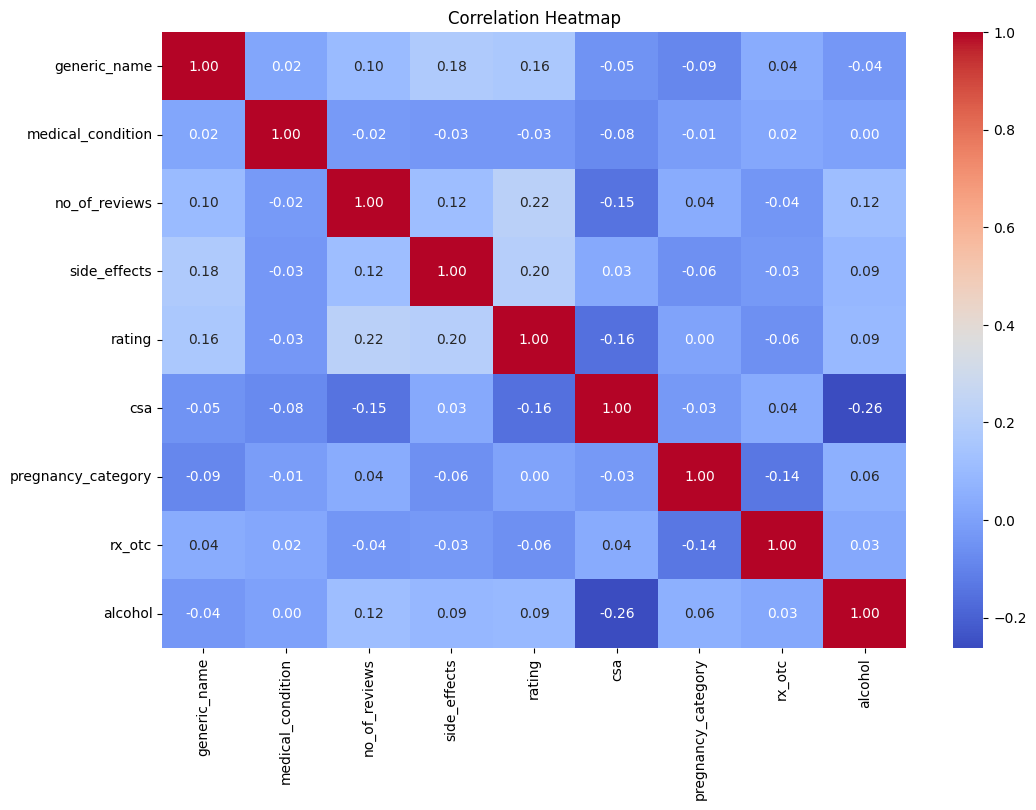

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Read the new version dataset
data_ver4 = pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

# Importing necessary libraries 
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import pandas as pd

# Check for occurrence and frequency of medical conditions, sorted from highest to lowest
medical_condition_counts = data_ver4['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD     

In [36]:
# Save the results to CSV files if needed
medical_condition_counts.to_csv('medical_condition_counts.csv')

In [37]:
# Importing necessary libraries for processing text
from collections import Counter
import re

# Function to extract side effects from text, split by semicolons
def extract_side_effects(text):
    # Split the text on semicolons then strip whitespace
    return [effect.strip() for effect in re.split(r'[;]', text)]

# Extract and count occurrences of side effects
side_effects = data_ver4['side_effects'].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)

print("\nSide effects occurrence and frequency (sorted from highest to lowest):")
print(side_effect_counts)


Side effects occurrence and frequency (sorted from highest to lowest):
side_effects
hives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [38]:
# Save the side effect counts to a CSV file
side_effect_counts.to_csv('side_effect_counts.csv')

In [39]:
# Function to extract drug classes from text, split by commas
def extract_drug_classes(text):
    # Split the text on commas then strip whitespace
    return [effect.strip() for effect in re.split(r'[,]', text)]

# Extract and count occurrences of drug classes
drug_classes = data_ver4['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)

print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")
print(drug_classes_counts)


Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations           245
Topical acne agents                      125
Topical steroids                          94
Antihistamines                            82
Unknown                                   82
                                        ... 
Immune globulins                           1
Smoking cessation agents                   1
Mouth and throat products                  1
Skeletal muscle relaxant combinations      1
Anthelmintics                              1
Name: count, Length: 244, dtype: int64


In [40]:
# Save the drug classes counts to a CSV file
drug_classes_counts.to_csv('drug_classes_counts.csv')

In [41]:
# Define functions to check for specific side effects and create new boolean columns
def has_hives(text):
    return 'hives' in text.lower()
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)

def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
data_ver4['Difficult Breathing'] = data_ver4['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
    return 'itching' in text.lower()
data_ver4['Itching'] = data_ver4['side_effects'].apply(has_itching)

In [42]:
# Define functions to check for specific drug classes and create new boolean columns
def is_usc(text):
    return 'Upper respiratory combinations' in text
data_ver4['Upper respiratory combinations'] = data_ver4['drug_classes'].apply(is_usc)

def is_steriods(text):
    return 'Topical steroids' in text
data_ver4['Topical steroids'] = data_ver4['drug_classes'].apply(is_steriods)

def is_acne(text):
    return 'Topical acne agents' in text
data_ver4['Topical acne agents'] = data_ver4['drug_classes'].apply(is_acne)

In [43]:
# Define functions to check for specific medical conditions and create new boolean columns
def has_pain(text):
    return 'Pain' in text
data_ver4['Pain'] = data_ver4['medical_condition'].apply(has_pain)

def has_colds_and_flu(text):
    return 'Colds & Flu' in text
data_ver4['Colds & Flu'] = data_ver4['medical_condition'].apply(has_colds_and_flu)

def has_acne(text):
    return 'Acne' in text
data_ver4['Acne'] = data_ver4['medical_condition'].apply(has_acne)

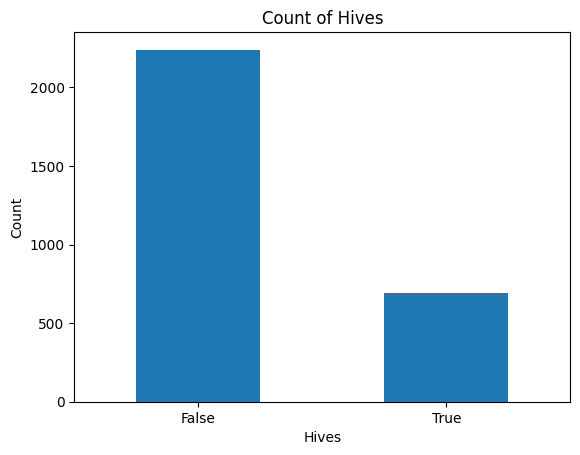

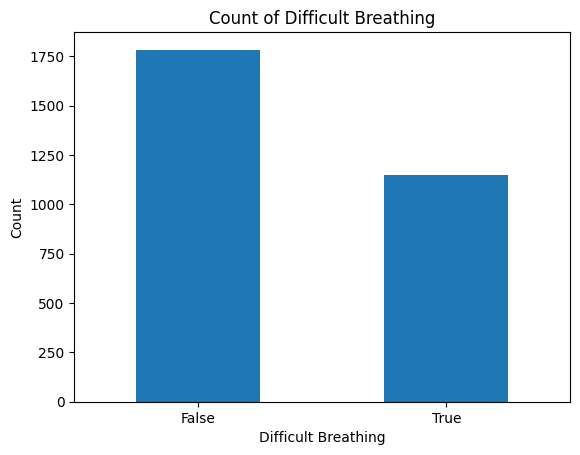

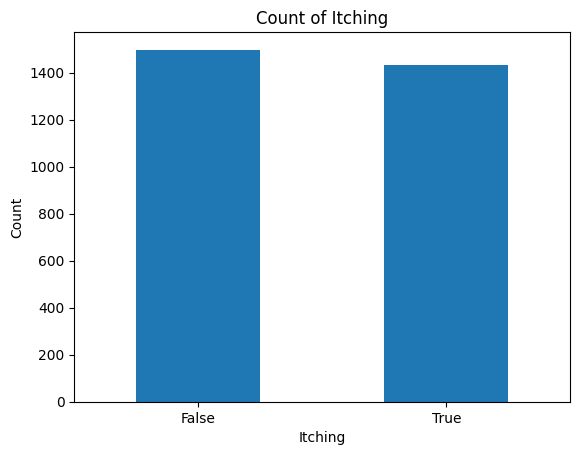

In [44]:
# Plot the count of occurrences for each side effect
import seaborn as sns

# Plot count of Hives
data_ver4['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Difficult Breathing
data_ver4['Difficult Breathing'].value_counts().plot(kind='bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Itching
data_ver4['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

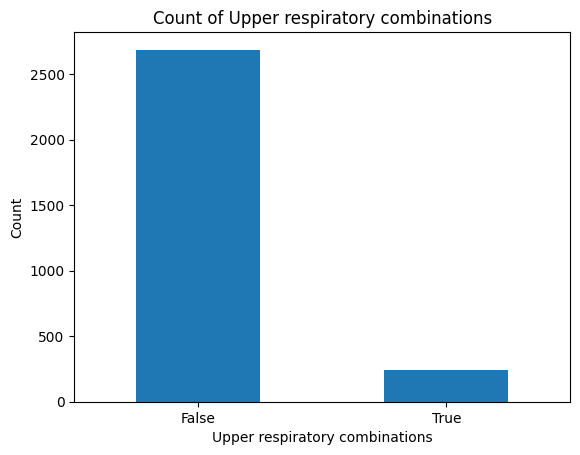

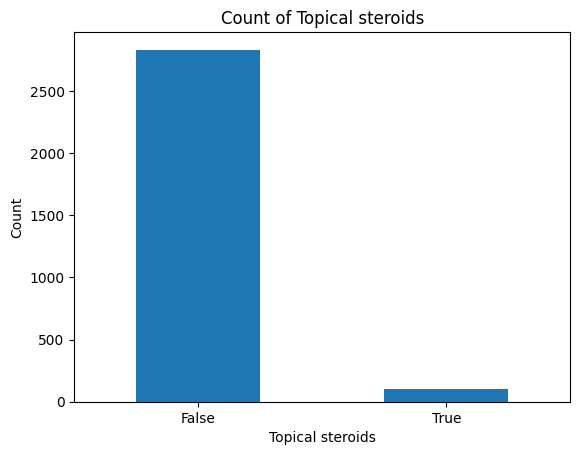

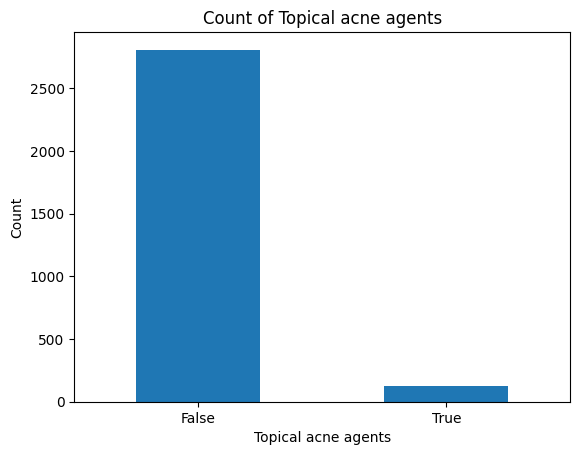

In [45]:
# Plot the count of occurrences for each drug class

# Plot count of Upper respiratory combinations
data_ver4['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Topical steroids
data_ver4['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Topical acne agents
data_ver4['Topical acne agents'].value_counts().plot(kind='bar')
plt.title('Count of Topical acne agents')
plt.xlabel('Topical acne agents')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

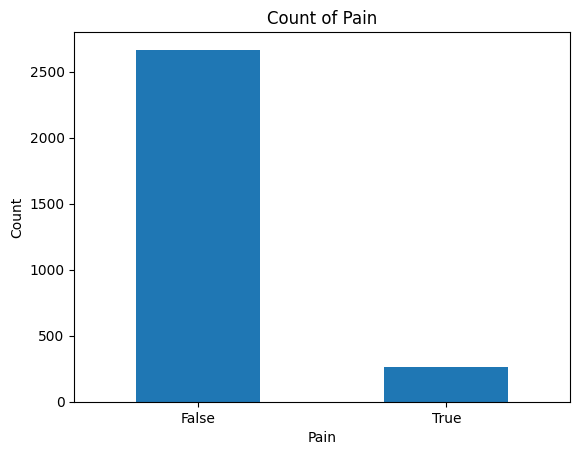

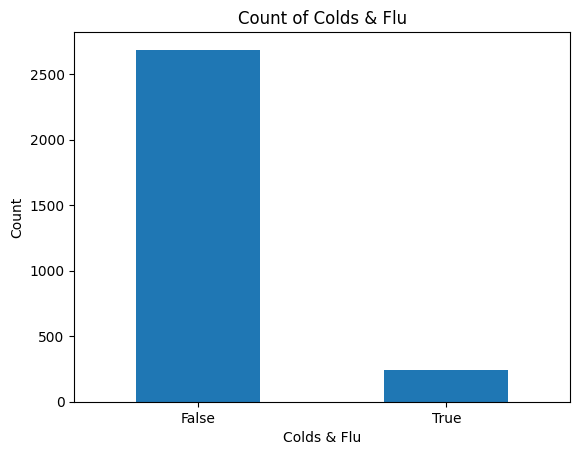

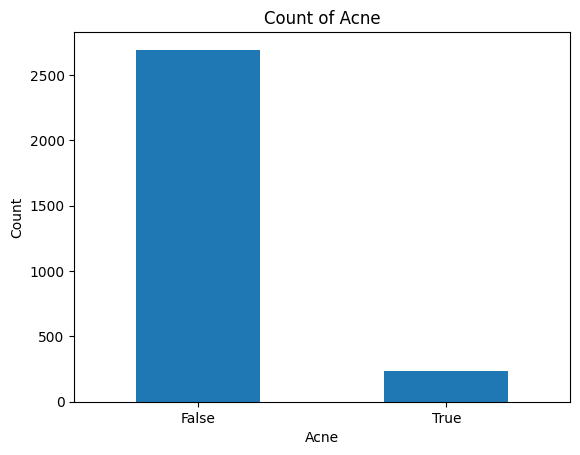

In [46]:
# Plot the count of occurrences for each medical condition

# Plot count of Pain
data_ver4['Pain'].value_counts().plot(kind='bar')
plt.title('Count of Pain')
plt.xlabel('Pain')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Colds & Flu
data_ver4['Colds & Flu'].value_counts().plot(kind='bar')
plt.title('Count of Colds & Flu')
plt.xlabel('Colds & Flu')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Acne
data_ver4['Acne'].value_counts().plot(kind='bar')
plt.title('Count of Acne')
plt.xlabel('Acne')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [47]:
data_ver5=data_ver4.copy()

In [48]:
# List of columns those are needed for ARM
columns_to_show = ['Hives', 'Difficult Breathing', 'Itching', 'Upper respiratory combinations', 'Topical steroids', 'Topical acne agents', 'Pain', 'Colds & Flu', 'Acne']

# Create a new DataFrame with only the columns you want to show
data_ver4_subset = data_ver4[columns_to_show]

# Display the first few rows of the subset DataFrame
print("\nFirst few rows of the subset DataFrame:")
print(data_ver4_subset.iloc[900:910])

from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'data_ver4' is your original DataFrame
columns_to_show = ['Hives', 'Difficult Breathing', 'Itching', 
                   'Upper respiratory combinations', 'Topical steroids', 
                   'Topical acne agents', 'Pain', 'Colds & Flu', 'Acne']

# Create a new DataFrame with only the columns you want to show
data_ver4_subset = data_ver4[columns_to_show]

# Display the first few rows of the subset DataFrame
print("\nFirst few rows of the subset DataFrame:")
print(data_ver4_subset.iloc[900:910])


First few rows of the subset DataFrame:
     Hives  Difficult Breathing  Itching  Upper respiratory combinations  \
900   True                False     True                            True   
901   True                 True    False                            True   
902   True                False     True                            True   
903   True                False     True                            True   
904   True                 True     True                            True   
905   True                False     True                            True   
906   True                 True    False                            True   
907   True                 True     True                            True   
908  False                False    False                            True   
909  False                False    False                            True   

     Topical steroids  Topical acne agents   Pain  Colds & Flu   Acne  
900             False                False  False 

In [49]:
# Convert columns to boolean
bool_columns = ['Hives', 'Difficult Breathing', 'Itching', 
                'Upper respiratory combinations', 'Topical steroids', 
                'Topical acne agents', 'Pain', 'Colds & Flu', 'Acne']
for col in bool_columns:
    data_ver4[col] = data_ver4[col].astype(bool)
    
# Create new columns for combined drug classes and medical conditions with 'T' and 'F'
data_ver4['DrugClass_MedCondition'] = (
    data_ver4['Upper respiratory combinations'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Topical steroids'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Topical acne agents'].replace({True: 'T', False: 'F'}) + 
    data_ver4['Pain'].replace({True: 'T', False: 'F'}) +
    data_ver4['Colds & Flu'].replace({True: 'T', False: 'F'}) +
    data_ver4['Acne'].replace({True: 'T', False: 'F'})
)

# Verify the creation of the new column
print("\nFirst few rows of the DataFrame with the new combined column:")
print(data_ver4[['DrugClass_MedCondition']].head())


First few rows of the DataFrame with the new combined column:
  DrugClass_MedCondition
0                 FFFFFT
1                 FFFFFT
2                 FFFFFT
3                 FFFFFT
4                 FFTFFT


In [50]:
# Filter out rows where DrugClass_MedCondition has fewer than 2 'T's
data_ver4 = data_ver4[data_ver4['DrugClass_MedCondition'].str.count('T') >= 2]

# Verify the creation of the new column
print("\nFirst few rows of the DataFrame with the new combined column with at least two T's:")
print(data_ver4[['DrugClass_MedCondition']].head())


First few rows of the DataFrame with the new combined column with at least two T's:
   DrugClass_MedCondition
4                  FFTFFT
6                  FFTFFT
9                  FFTFFT
10                 FFTFFT
11                 FFTFFT


In [51]:
# One-hot encode the new combined column and the side effects
data_ver4_subset = pd.get_dummies(data_ver4[['DrugClass_MedCondition', 'Hives', 'Difficult Breathing', 'Itching']])
data_ver4_subset.head()

,Hives,Difficult Breathing,Itching,DrugClass_MedCondition_FFTFFT,DrugClass_MedCondition_TFFFTF
4,True,True,True,True,False
6,True,True,True,True,False
9,True,True,False,True,False
10,True,True,False,True,False
11,True,True,True,True,False


In [52]:
# Apply the Apriori algorithm
freq_items = apriori(data_ver4_subset, min_support=0.2, use_colnames=True, verbose=1)

# Generate the association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)

# Filter rules to ensure DrugClass_MedCondition is in antecedents and side effects are in consequents
side_effects = {'Hives', 'Difficult Breathing', 'Itching'}
rules_filtered = rules[
    rules['antecedents'].apply(lambda x: any(item.startswith('DrugClass_MedCondition_') for item in x) and not any(item in side_effects for item in x)) &
    rules['consequents'].apply(lambda x: any(item in side_effects for item in x) and len(x) == 1)
]

print(rules_filtered.head(30))

Processing 5 combinations | Sampling itemset size 54
                        antecedents            consequents  \
4   (DrugClass_MedCondition_FFTFFT)                (Hives)   
5   (DrugClass_MedCondition_TFFFTF)                (Hives)   
9   (DrugClass_MedCondition_FFTFFT)  (Difficult Breathing)   
11  (DrugClass_MedCondition_TFFFTF)  (Difficult Breathing)   
12  (DrugClass_MedCondition_FFTFFT)              (Itching)   
14  (DrugClass_MedCondition_TFFFTF)              (Itching)   

    antecedent support  consequent support   support  confidence      lift  \
4             0.379939            0.939210  0.340426    0.896000  0.953994   
5             0.620061            0.939210  0.598784    0.965686  1.028190   
9             0.379939            0.702128  0.258359    0.680000  0.968485   
11            0.620061            0.702128  0.443769    0.715686  1.019311   
12            0.379939            0.729483  0.349544    0.920000  1.261167   
14            0.620061            0.729483  

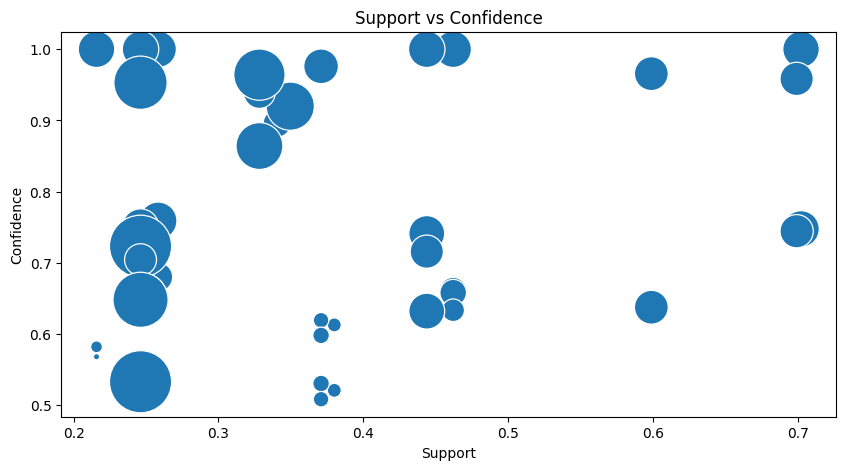

In [53]:
# Ignore deprecation warnings for seaborn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Create the scatter plot for support vs confidence
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [54]:
# Define the function to create the 'Drug Class' column
def classify_drug(row):
    if row['Upper respiratory combinations'] == 1:
        return 'URC'
    else:
        return 'Non-URC'

# Apply the function to create the new 'Drug Class' column
data_ver5['Drug Class'] = data_ver5.apply(classify_drug, axis=1)

# Print a subset of the DataFrame to verify the results
print(data_ver5.iloc[900:910])

                                           drug_name medical_condition  \
900                                      Deltuss DMX       Colds & Flu   
901             dexbrompheniramine / pseudoephedrine       Colds & Flu   
902    dextromethorphan / phenylephrine / pyrilamine       Colds & Flu   
903  dextromethorphan / phenylephrine / triprolidine       Colds & Flu   
904               Diabetic Tussin Night Time Formula       Colds & Flu   
905                                          Dologen       Colds & Flu   
906                       doxylamine / phenylephrine       Colds & Flu   
907               Dristan Cold Multi Symptom Formula       Colds & Flu   
908                                          Flutabs       Colds & Flu   
909                        ibuprofen / phenylephrine       Colds & Flu   

                                          side_effects  \
900  WARNING/CAUTION: Even though it may be rare, s...   
901  hives ; difficulty breathing; swelling of your...   
902  WARNIN

In [55]:
# List of columns those are needed for ARM
new_columns = ['drug_name','Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne',  'Drug Class']

# Create a new DataFrame with only the columns you want to show
data_ver5_subset = data_ver5[new_columns]

# Display the first few rows of the subset DataFrame
print("\nFirst few rows of the subset DataFrame:")
print(data_ver5_subset.iloc[900:910])


First few rows of the subset DataFrame:
                                           drug_name  Hives  \
900                                      Deltuss DMX   True   
901             dexbrompheniramine / pseudoephedrine   True   
902    dextromethorphan / phenylephrine / pyrilamine   True   
903  dextromethorphan / phenylephrine / triprolidine   True   
904               Diabetic Tussin Night Time Formula   True   
905                                          Dologen   True   
906                       doxylamine / phenylephrine   True   
907               Dristan Cold Multi Symptom Formula   True   
908                                          Flutabs  False   
909                        ibuprofen / phenylephrine  False   

     Difficult Breathing  Itching   Pain  Colds & Flu   Acne Drug Class  
900                False     True  False         True  False        URC  
901                 True    False  False         True  False        URC  
902                False     True  False   

In [56]:
print(data_ver5_subset.columns)

Index(['drug_name', 'Hives', 'Difficult Breathing', 'Itching', 'Pain',
       'Colds & Flu', 'Acne', 'Drug Class'],
      dtype='object')


In [57]:
from sklearn import tree
import matplotlib.pyplot as plt

Y = data_ver5_subset['Drug Class']
X = data_ver5_subset.drop(['drug_name', 'Drug Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

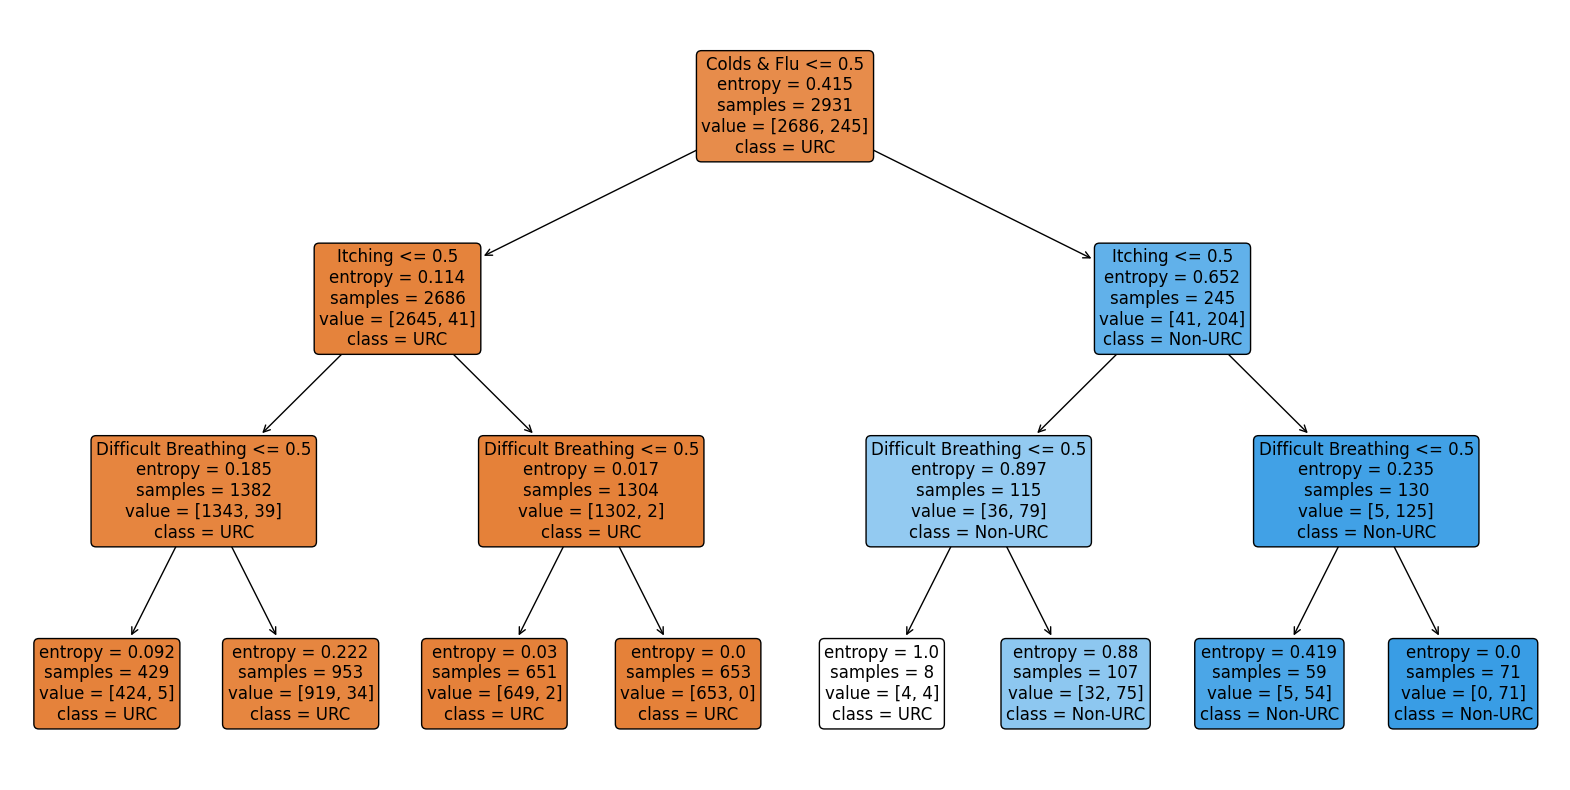

In [58]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne'], class_names=['URC', 'Non-URC'], filled=True, rounded=True, fontsize=12)
plt.show()

In [59]:
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne'])
print(tree_rules)

|--- Colds & Flu <= 0.50
|   |--- Itching <= 0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: Non-URC
|   |--- Itching >  0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: Non-URC
|--- Colds & Flu >  0.50
|   |--- Itching <= 0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: Non-URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: URC
|   |--- Itching >  0.50
|   |   |--- Difficult Breathing <= 0.50
|   |   |   |--- class: URC
|   |   |--- Difficult Breathing >  0.50
|   |   |   |--- class: URC



In [60]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y,test_size = 0.4, random_state = 42)
clf = clf.fit(X_train, y_train)
test_pred_decision_tree = clf.predict(test_x)

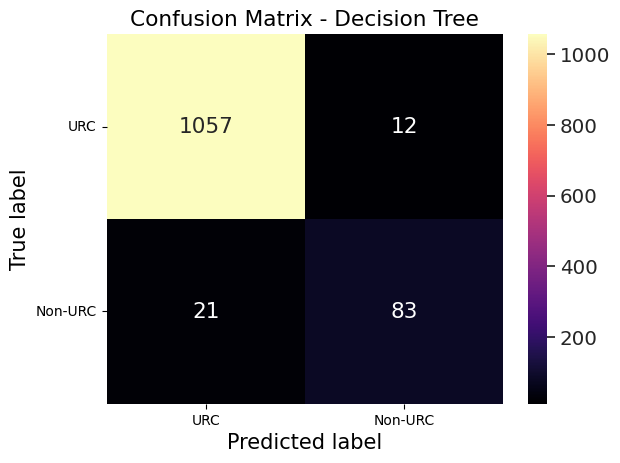

<Figure size 1500x1000 with 0 Axes>

In [61]:
# import the relevant packages
from sklearn import metrics
# get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)

# turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15,10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
# set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['URC', 'Non-URC'])
ax.set_ylabel('True label', fontsize =15)
ax.set_yticklabels(['URC', 'Non-URC'], rotation = 0)
plt.show()

In [62]:
print(metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

     Non-URC       0.98      0.99      0.98      1069
         URC       0.87      0.80      0.83       104

    accuracy                           0.97      1173
   macro avg       0.93      0.89      0.91      1173
weighted avg       0.97      0.97      0.97      1173



In [63]:
# %matplotlib inline

# N = 2500

# mean1 = [6, 14]
# mean2 = [10, 6]
# mean3 = [14, 14]
# cov = [[3.5, 0], [0, 3.5]] # diagonal covariance

# np.random.seed(50)
# X = np.random.multivariate_normal(mean1, cov, int(N/6))
# X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
# X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
# X = np.concatenate((X, 20*np.random.rand(int(N/2), 2)))
# Y = np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

# # Plotting with red and blue colors
# plt.figure(figsize=(10,10))
# plt.plot(X[:int(N/2), 0], X[:int(N/2), 1], 'r+', label='Class 1')
# plt.plot(X[int(N/2):, 0], X[int(N/2):, 1], 'b.', ms=4, label='Class 0')
# plt.legend()
# plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Check lengths of X and Y
if len(data_ver5_subset['Drug Class']) == 2498:
    data = data_ver5_subset.iloc[:2498]  # Trim the data to match the shorter length

# Assign features and target variable
Y = data_ver5_subset['Drug Class']
X = data_ver5_subset[['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne']]

# Ensure X and Y have the same length
assert len(X) == len(Y)

# Training and Test set creation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Model fitting and evaluation
maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

In [65]:
# import svm model
from sklearn import svm

# split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y, test_size= 0.2, random_state =1)

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(test_x)


# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_predTest))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(Y_test, Y_predTest, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(Y_test, Y_predTest, average='macro'))

# Model F1 Score: weighted average of precision and recall
print("F1 Score:", metrics.f1_score(Y_test, Y_predTest, average='macro'))

Accuracy: 0.9710391822827938
Precision: 0.8603591530420799
Recall: 0.9066848154869933
F1 Score: 0.8818619848701891


In [66]:
data_ver6 = df
data_ver6

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,642,2,760.0,15,6.8,5,3,1,1
1,1270,2,449.0,1972,7.2,5,2,1,1
2,1034,2,482.0,2697,5.7,5,3,1,0
3,903,2,623.0,2570,7.9,5,6,1,1
4,505,2,146.0,1260,7.4,5,1,1,0
...,...,...,...,...,...,...,...,...,...
2926,361,46,17.0,1955,7.5,1,6,1,1
2927,729,46,0.0,1647,0.0,2,2,1,1
2928,1157,46,0.0,532,0.0,1,2,1,1
2929,1259,46,0.0,416,0.0,5,5,1,0


In [67]:
# Drop rows where 'rating' and 'no_of_reviews' are 0
data_ver6 = data_ver6[(data_ver6['rating'] != 0) & (data_ver6['no_of_reviews'] != 0)]

# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating <= 5.0:
        return '0.0 to 5.0'
    else:
        return '5.1 to 10.0'

# Apply the function to create a new column 'rating_category'
data_ver6['rating_category'] = data_ver6['rating'].apply(categorize_rating)

# Filter rows with ratings 5.0 to 10.0
filtered_data = data_ver6[data_ver6['rating'] > 5.0]

# # Display the updated DataFrame
# print(data_ver6.head())

# # Display rows 500 to 515
# print(data_ver6.iloc[500:515])

# Display the number of rows and columns
num_rows, num_columns = data_ver6.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

# Sort the DataFrame by 'no_of_reviews' from highest to lowest
sorted_data = data_ver6.sort_values(by='no_of_reviews', ascending=False)

# Display the sorted DataFrame
print(sorted_data)

Number of rows: 1560
Number of columns: 10
      generic_name  medical_condition  no_of_reviews  side_effects  rating  \
2908          1161                 46         2934.0          1616     8.7   
2920           396                 46         2013.0           932     6.6   
2910           396                 46         1939.0           933     6.6   
523            690                  6         1471.0          2684     7.4   
2917           949                 46         1377.0          2483     7.5   
...            ...                ...            ...           ...     ...   
2554          1381                 37            1.0          2261     1.0   
2555           204                 37            1.0          2151     9.0   
693            449                  9            1.0          2644     8.0   
2572            70                 37            1.0           756    10.0   
1042          1009                 14            1.0          1254    10.0   

      csa  pregnancy

/tmp/ipykernel_30/1956482253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ver6['rating_category'] = data_ver6['rating'].apply(categorize_rating)


In [68]:
# """No of Reviews and Side Effects KMeans"""

# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Feature selection for clustering
# features = filtered_data[['no_of_reviews', 'side_effects', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol']]

# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# clusters = kmeans.fit_predict(scaled_features)

# # Add cluster labels to the DataFrame
# filtered_data['cluster'] = clusters

# # Display the DataFrame with cluster labels
# print(filtered_data.head())

# # Visualize the clusters (example using no_of_reviews and side_effects)
# plt.scatter(filtered_data['no_of_reviews'], filtered_data['side_effects'], c=filtered_data['cluster'], cmap='viridis')
# plt.xlabel('No of Reviews')
# plt.ylabel('Side Effects')
# plt.title('KMeans Clusters based on No of Reviews and Side Effects')
# plt.show()

/tmp/ipykernel_30/4102431395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = clusters


   generic_name  medical_condition  no_of_reviews  side_effects  rating  csa  \
0           642                  2          760.0            15     6.8    5   
1          1270                  2          449.0          1972     7.2    5   
2          1034                  2          482.0          2697     5.7    5   
3           903                  2          623.0          2570     7.9    5   
4           505                  2          146.0          1260     7.4    5   

   pregnancy_category  rx_otc  alcohol rating_category  cluster  
0                   3       1        1     5.1 to 10.0       -1  
1                   2       1        1     5.1 to 10.0       -1  
2                   3       1        0     5.1 to 10.0       -1  
3                   6       1        1     5.1 to 10.0       -1  
4                   1       1        0     5.1 to 10.0        0  


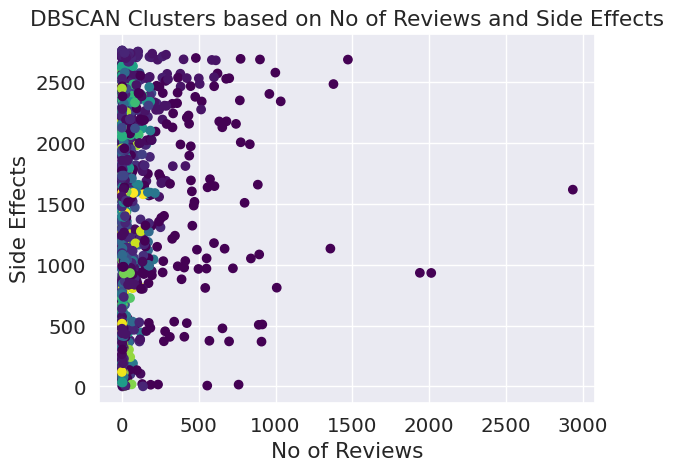

In [69]:
"""No of Reviews and Side Effects DBSCAN"""

from sklearn.cluster import DBSCAN

# Feature selection for clustering
features = filtered_data[['no_of_reviews', 'side_effects', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
filtered_data['cluster'] = clusters

# Display the DataFrame with cluster labels
print(filtered_data.head())

# Visualize the clusters (example using no_of_reviews and side_effects)
plt.scatter(filtered_data['no_of_reviews'], filtered_data['side_effects'], c=filtered_data['cluster'], cmap='viridis')
plt.xlabel('No of Reviews')
plt.ylabel('Side Effects')
plt.title('DBSCAN Clusters based on No of Reviews and Side Effects')
plt.show()

In [70]:
# # """Number of reviews with rating > 5.0 KMeans"""

# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Filter rows with ratings 5.0 to 10.0
# filtered_data = data_ver6[data_ver6['rating'] > 5.0]

# # Select the 'no_of_reviews' column for clustering
# features = filtered_data[['no_of_reviews']]

# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# clusters = kmeans.fit_predict(scaled_features)

# # Add cluster labels to the DataFrame
# filtered_data['kmeans_cluster'] = clusters

# # Display the DataFrame with cluster labels
# print(filtered_data.head())

# # Visualize the clusters
# plt.scatter(filtered_data['no_of_reviews'], filtered_data['rating'], c=filtered_data['kmeans_cluster'], cmap='viridis')
# plt.xlabel('No of Reviews')
# plt.ylabel('Rating')
# plt.title('K-means Clusters based on No of Reviews and Rating')
# plt.show()

In [71]:
data_ver7 = data_ver5_subset.copy()
data_ver7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   drug_name            2931 non-null   object
 1   Hives                2931 non-null   bool  
 2   Difficult Breathing  2931 non-null   bool  
 3   Itching              2931 non-null   bool  
 4   Pain                 2931 non-null   bool  
 5   Colds & Flu          2931 non-null   bool  
 6   Acne                 2931 non-null   bool  
 7   Drug Class           2931 non-null   object
dtypes: bool(6), object(2)
memory usage: 63.1+ KB


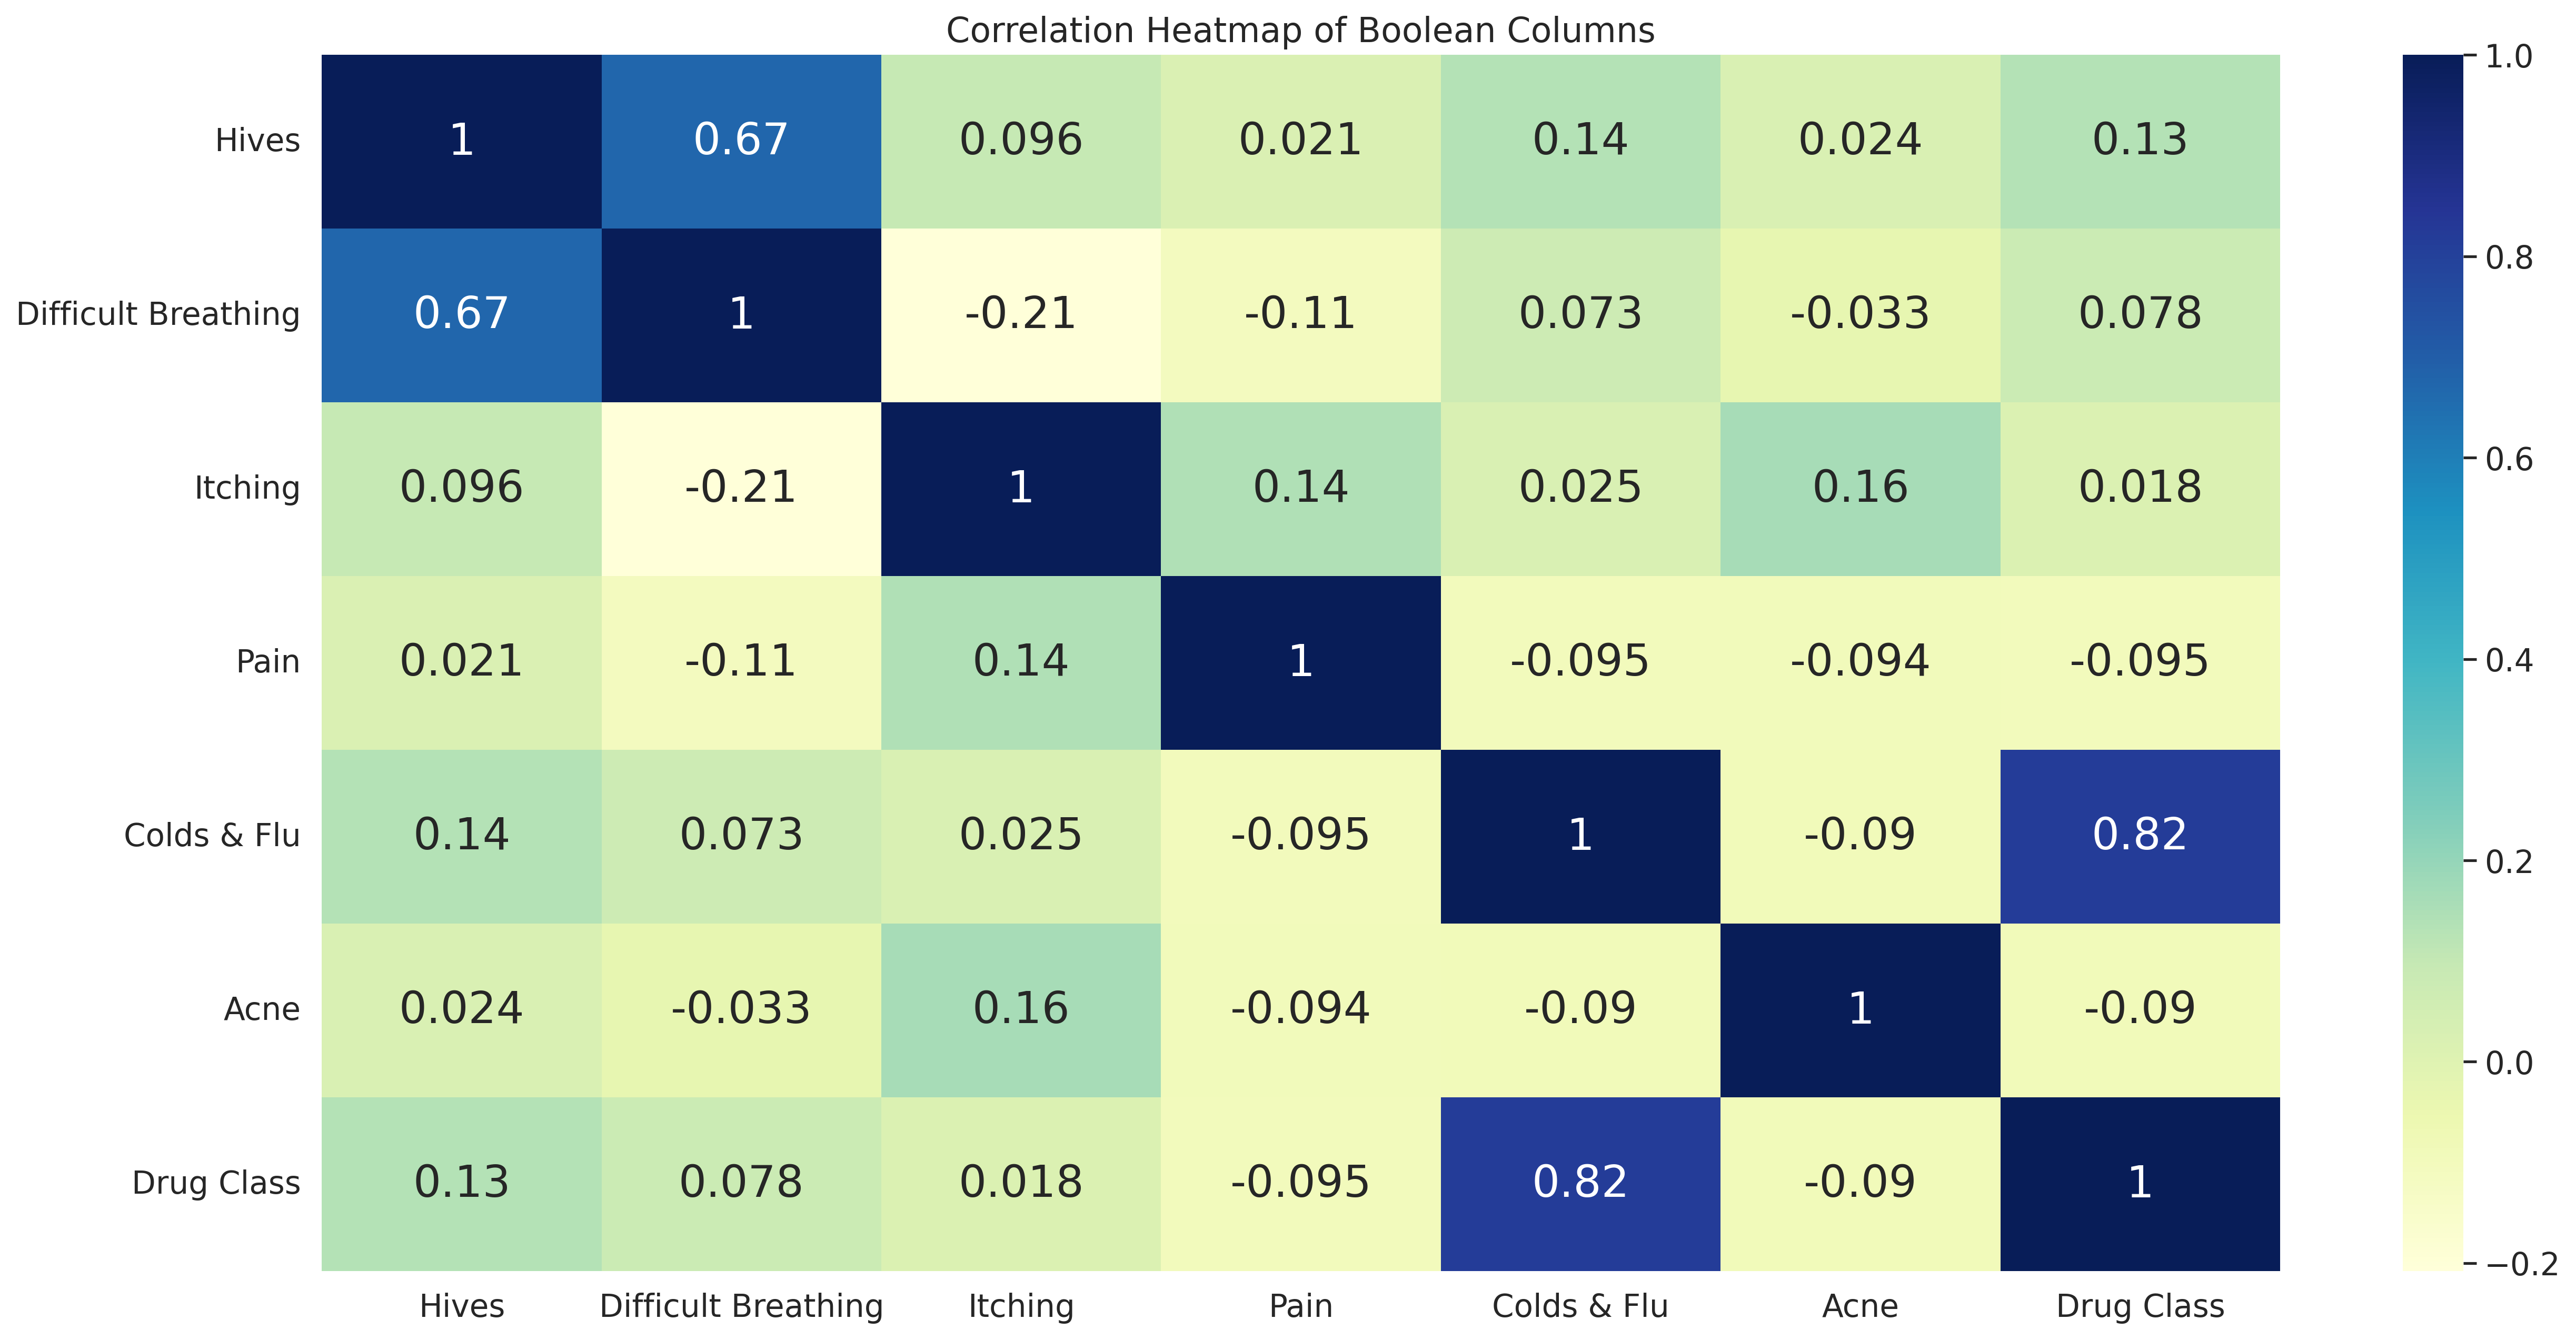

In [72]:
# Create a copy of the DataFrame
# data_ver7 = data_ver5.copy()

# Convert boolean columns to integers (0 and 1)
boolean_columns = ['Hives', 'Difficult Breathing', 'Itching', 'Pain', 'Colds & Flu', 'Acne', 'Drug Class']

# For 'Drug Class', encode 'URC' as 1 and 'Non-URC' as 0
data_ver7['Drug Class'] = data_ver7['Drug Class'].map({'URC': 1, 'Non-URC': 0})

# Convert other boolean columns to integers
for column in boolean_columns[1:]:
    data_ver7[column] = data_ver7[column].astype(int)

# Select only the boolean columns converted to numerical values
numerical_columns = data_ver7[boolean_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# # Create the heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", cbar=True)
# plt.show()

# Create a high-resolution heatmap
plt.figure(figsize=(20, 10), dpi=300) # Increase figure size and DPI for higher resolution
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", cbar=True, annot_kws={'size':20})
plt.title('Correlation Heatmap of Boolean Columns')
plt.show()

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Encode 'Drug Class' and 'Colds & Flu'
data_ver7['Drug Class'] = label_encoder.fit_transform(data_ver5['Drug Class'])
data_ver7['Colds & Flu'] = data_ver7['Colds & Flu'].astype(int)

# Prepare features and target variable
X = data_ver7[['Drug Class']]
y = data_ver7['Colds & Flu']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 0.016746943753902094
R-squared: 0.7233976770042043
Coefficient: 0.8160436137071686
Intercept: 0.017289719626167918


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


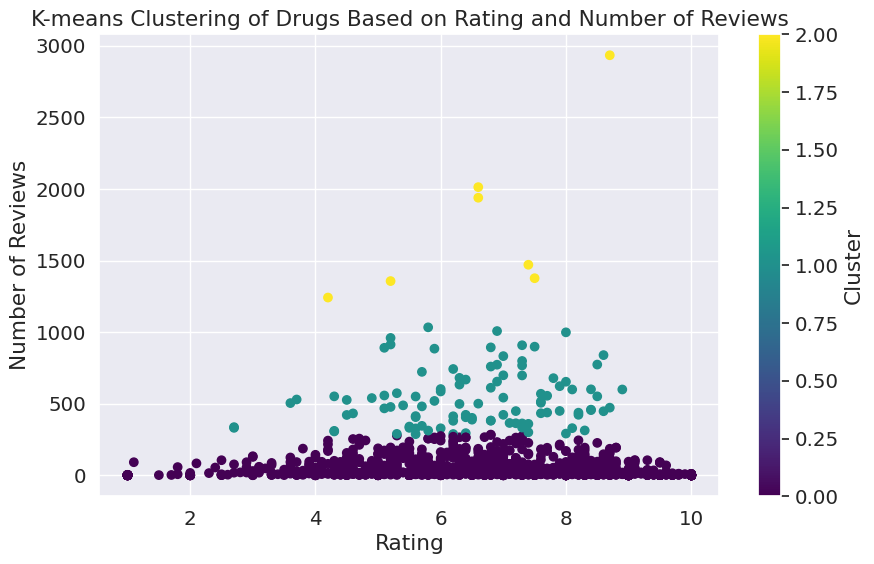

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract relevant columns
clustering_data = data_ver6[['rating', 'no_of_reviews']].dropna()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(clustering_data)

# Add cluster labels to the original data
clustering_data['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data['rating'], clustering_data['no_of_reviews'], c=clustering_data['cluster'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('K-means Clustering of Drugs Based on Rating and Number of Reviews')
plt.colorbar(label='Cluster')
plt.show()

In [75]:
# Cluster 0 (purple): Concentrated at the lower end of both ratings and reviews.
# Cluster 1 (green): Spread across a broader range of ratings and reviews.
# Cluster 2 (yellow): Includes entries with relatively higher ratings and a large number of reviews.